In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
tesla_acc = "data/Tesla Deaths - Deaths_2.csv"

# Read the Telsa_accidents data
tesla_data = pd.read_csv(tesla_acc)

In [58]:
tesla_data

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,296,2022,1/30/2023,USA,MO,Speeding Tesla crashes into car,1,0.0,0.0,1.0,...,0.0,0.0,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN,NaN,NaN,NaN,NaN
1,295,2022,1/21/2023,USA,CA,Tesla crashses into resident's pool,1,1.0,0.0,0.0,...,0.0,0.0,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN,NaN,NaN,NaN,NaN
2,294,2022,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
3,293,2022,01/07/23,Canada,0,Tesla crashes,1,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
4,292,2022,01/07/23,USA,WA,"Tesla hits pole, catches on fire",1,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,0.0,0.0,1.0,...,0.0,0.0,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
292,4,2014,07/04/14,USA,CA,Thief crashes stolen Tesla,1,1.0,0.0,0.0,...,0.0,0.0,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
293,3,2014,07/04/14,USA,CA,Tesla rear ends stopped car,3,0.0,0.0,3.0,...,0.0,0.0,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
294,2,2013,11/02/13,USA,CA,Tesla kills cyclist,1,0.0,0.0,0.0,...,0.0,0.0,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN


In [59]:
# Tesla Deaths by US State
d_by_state = tesla_data.groupby(' State ')[' Deaths '].count().sort_values(ascending=False)
d_by_state.head()

 State 
0       79
 CA     75
 FL     24
CA      17
 AZ      8
Name:  Deaths , dtype: int64

In [60]:
# Number of deaths by crash
d_by_date = tesla_data.groupby('Date')[' Deaths '].count().sort_values(ascending=False)
d_by_date

Date
11/20/2019    3
5/28/2022     3
6/20/2022     3
01/01/22      2
07/04/14      2
             ..
10/19/2019    1
10/19/2022    1
10/26/2018    1
10/28/2021    1
9/24/2017     1
Name:  Deaths , Length: 265, dtype: int64

In [61]:
# List all Columns
columns_list = tesla_data.columns.tolist()
print(columns_list)

['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ', ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ', ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ', ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ', ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ']


In [62]:
# Deaths by year
comparison = tesla_data.groupby('Year')[' Tesla driver '].sum()
comparison

Year
2013     0.0
2014     2.0
2015     4.0
2016     5.0
2017     2.0
2018     8.0
2019    11.0
2020    13.0
2021    28.0
2022    45.0
Name:  Tesla driver , dtype: float64

In [67]:
# Calculate the total of a specific column (e.g., 'Column1')
total_driver = tesla_data[' Tesla driver '].sum()

total_driver

118.0

In [64]:
# Deaths by year
comparison_1 = tesla_data.groupby('Year')[' Tesla occupant '].sum()
comparison_1

Year
2013     0.0
2014     0.0
2015     0.0
2016     2.0
2017     0.0
2018     7.0
2019     6.0
2020     6.0
2021    11.0
2022    16.0
Name:  Tesla occupant , dtype: float64

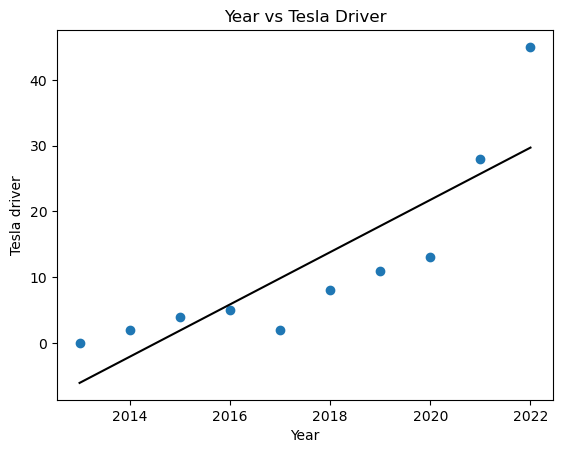

In [50]:
# Tesla Driver

def linear(x_values, y_values):
    slope,intercept,rvalue,pvalue,stderr =linregress(x_values,y_values)
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
    y_predict = intercept + (slope * x_values)
    return line_eq, y_predict

x_values = tesla_data.groupby('Year')[' Tesla driver '].sum().index
y_values = tesla_data.groupby('Year')[' Tesla driver '].sum()
line_eq, y_predict = linear(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = "black")

plt.ylabel('Tesla driver')
plt.xlabel('Year')
plt.title('Year vs Tesla Driver')

# Show plot
plt.show()

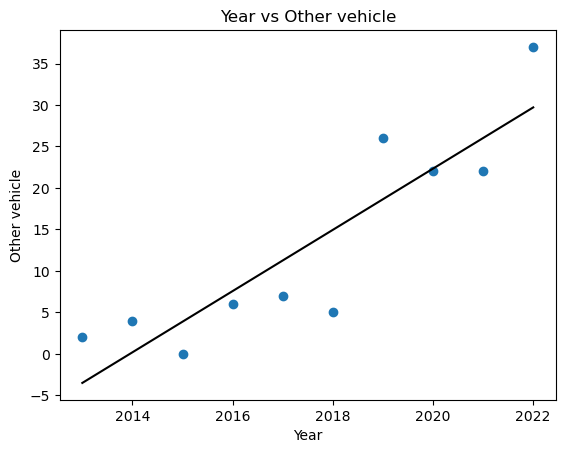

In [49]:
#Tesla occupant

def linear(x_values, y_values):
    slope,intercept,rvalue,pvalue,stderr =linregress(x_values,y_values)
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
    y_predict = intercept + (slope * x_values)
    return line_eq, y_predict

x_values = tesla_data.groupby('Year')[' Other vehicle '].sum().index
y_values = tesla_data.groupby('Year')[' Other vehicle '].sum()
line_eq, y_predict = linear(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = "black")

plt.ylabel('Other vehicle')
plt.xlabel('Year')
plt.title('Year vs Other vehicle')

# Show plot
plt.show()

In [68]:
# Calculate the total for Tesla driver (e.g., 'Column1')
total_driver = tesla_data[' Tesla driver '].sum()
total_driver

118.0

In [69]:
# Calculate the total for Tesla occupant (e.g., 'Column2')
total_occupant = tesla_data[' Tesla occupant '].sum()
total_occupant

48.0

In [71]:
# Calculate the total for other vehicles (e.g., 'Column3')
total_other = tesla_data[' Other vehicle '].sum()
total_other

131.0

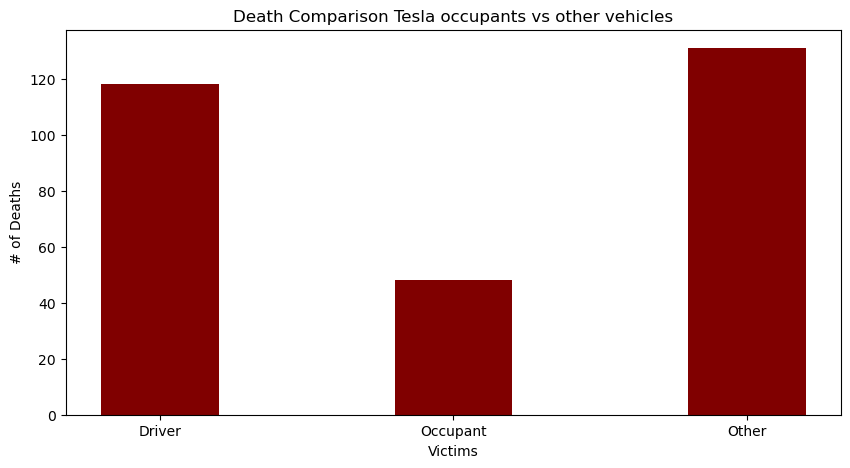

In [72]:
# creating the dataset
data = {'Driver':118, 'Occupant':48, 'Other':131}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Victims")
plt.ylabel("# of Deaths")
plt.title("Death Comparison Tesla occupants vs other vehicles")
plt.show()